In [1]:
# Imports
# Built-in

# External
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def read_data():
    col_names = ['country','continent','image_name','width','height','size','path']
    #Read operation
    df =  pd.read_csv('country_data.csv',names =col_names, header=None)
    return df.iloc[1:,:]

In [3]:
# Instantiation
df_countries = read_data()
df_countries

,country,continent,image_name,width,height,size,path
1,Albania,Europe,canvas_1629319286.jpg,1536,662,127948,compressed_dataset\Albania\canvas_1629319286.jpg
2,Albania,Europe,canvas_1629396895.jpg,1536,662,96075,compressed_dataset\Albania\canvas_1629396895.jpg
3,Albania,Europe,canvas_1629410084.jpg,1536,662,163115,compressed_dataset\Albania\canvas_1629410084.jpg
4,Albania,Europe,canvas_1629410254.jpg,1536,662,90838,compressed_dataset\Albania\canvas_1629410254.jpg
5,Albania,Europe,canvas_1629416860.jpg,1536,662,164910,compressed_dataset\Albania\canvas_1629416860.jpg
...,...,...,...,...,...,...,...
49937,Vietnam,Asia,canvas_1629967222.jpg,1536,662,147724,compressed_dataset\Vietnam\canvas_1629967222.jpg
49938,Vietnam,Asia,canvas_1630019453.jpg,1536,662,137581,compressed_dataset\Vietnam\canvas_1630019453.jpg
49939,Vietnam,Asia,canvas_1630054113.jpg,1536,662,141857,compressed_dataset\Vietnam\canvas_1630054113.jpg
49940,Vietnam,Asia,canvas_1630069875.jpg,1536,662,155611,compressed_dataset\Vietnam\canvas_1630069875.jpg


In [45]:
def determine_sizes(df):
    df_result = pd.DataFrame()
    df_result["unique_widths"]=df["width"].unique()  
    df_result["unique_heights"]=df["height"].unique()
    return df_result

In [46]:
determine_sizes(df_countries)

,unique_widths,unique_heights
0,1536,662
1,1030,703


Number of images per continent:
continent
Africa            2074
Antarctica           1
Asia              8852
Europe           18107
North America    14487
Oceania           2295
South America     4125
dtype: int64


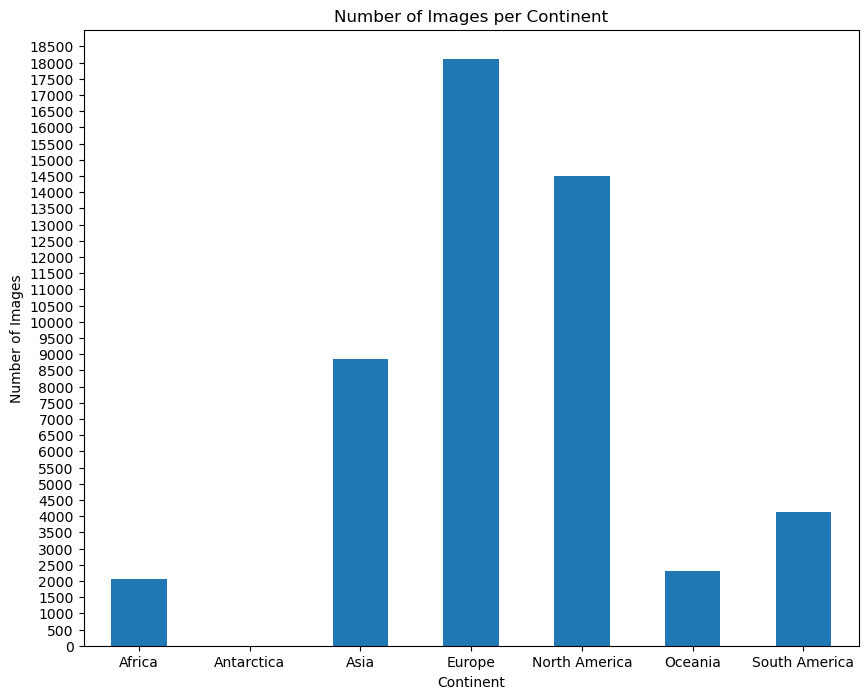

In [55]:
# Number of images per continent
print("Number of images per continent:")
print(df_countries.groupby("continent").size())
result = df_countries.groupby('continent').size()

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 8))
result.plot(kind='bar', x='continent', y='count', rot=0)
plt.xlabel('Continent')
plt.ylabel('Number of Images')
plt.title('Number of Images per Continent')
plt.yticks(range(0, result.max()+500, 500))
plt.show()

Number of countries per continent:
continent
Africa           15
Antarctica        1
Asia             32
Europe           44
North America    10
Oceania           5
South America    10
Name: country, dtype: int64


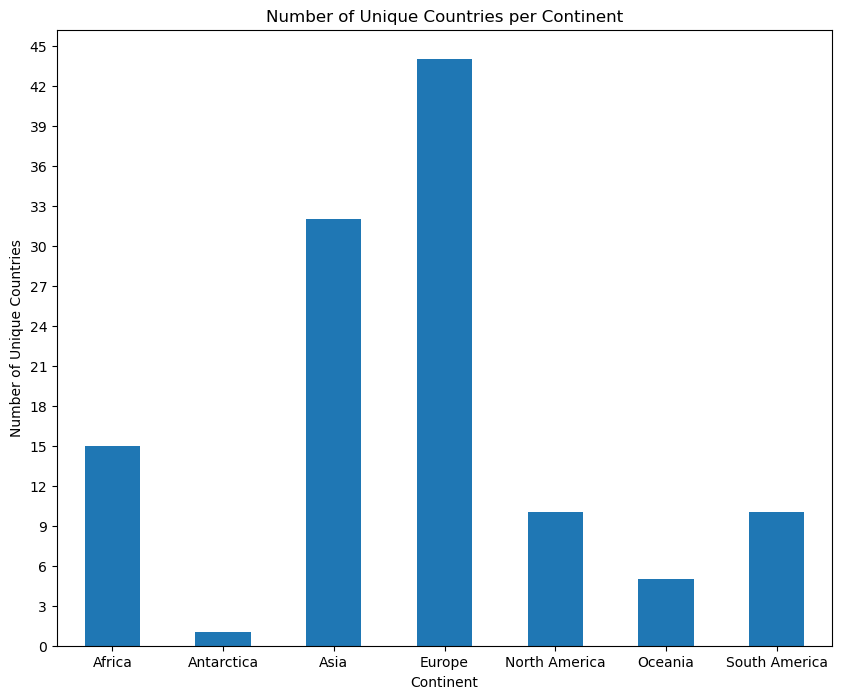

In [48]:
# Number of countries per continent
print("Number of countries per continent:")
print(df_countries.groupby('continent')['country'].nunique())

result = df_countries.groupby('continent')['country'].nunique()

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 8))
result.plot(kind='bar', x='continent', y='count', rot=0)
plt.xlabel('Continent')
plt.ylabel('Number of Unique Countries')
plt.title('Number of Unique Countries per Continent')
plt.yticks(range(0, result.max()+3, 3))
plt.show()

continent      country                 
Africa         Botswana                      144
               Egypt                          27
               Eswatini                       62
               Ghana                         107
               Kenya                         130
               Lesotho                        65
               Madagascar                     13
               Mozambique                      1
               Nigeria                       123
               Senegal                        75
               South Africa                 1183
               South Sudan                     1
               Tanzania                        1
               Tunisia                        87
               Uganda                         55
Antarctica     Antarctica                      1
Asia           Armenia                         1
               Bangladesh                    106
               Bhutan                         20
               Cambodia      

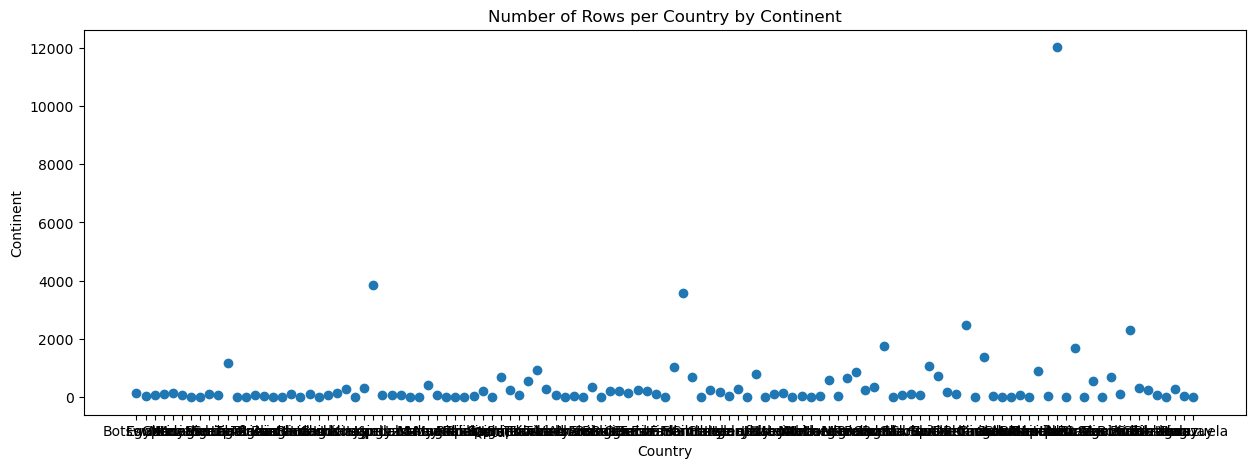

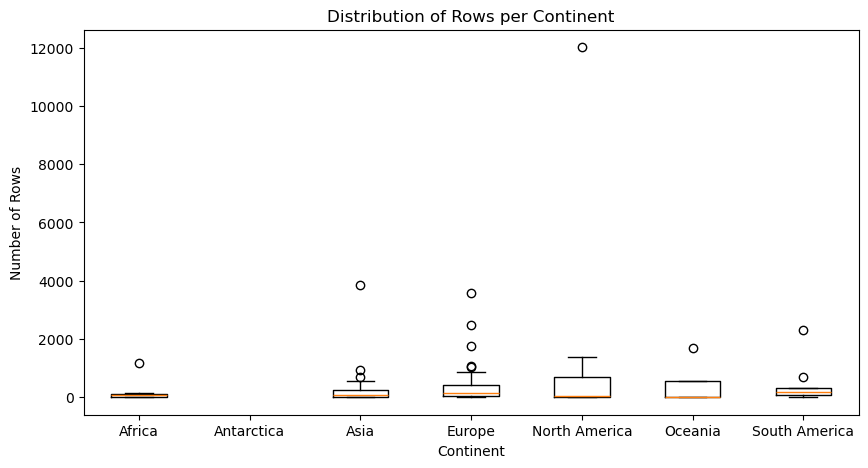

In [41]:
# Number of images per country
print(df_countries.groupby(['continent', 'country']).size().to_string())

# Plot scatterplot
result = df_countries.groupby(['continent', 'country']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(result['country'], result['count'])
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Number of Rows per Country by Continent')
plt.show()

# Plot boxplot to visualize outliers
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.boxplot([result[result['continent'] == 'Africa']['count'], result[result['continent'] == 'Antarctia']['count'], result[result['continent'] == 'Asia']['count'],result[result['continent'] == 'Europe']['count'], result[result['continent'] == 'North America']['count'], result[result['continent'] == 'Oceania']['count'], result[result['continent'] == 'South America']['count']])
ax2.set_xticklabels(['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
ax2.set_xlabel('Continent')
ax2.set_ylabel('Number of Rows')
ax2.set_title('Distribution of Rows per Continent')

plt.show()